# 👭 닮은꼴 연예인 찾기

#### "얼굴이 포함된 이미지를 넣으면 닮은꼴 연예인을 찾아주는 프로그램 제작"

### 🤔 목차

**1. 사진 모으기**   
**2. 얼굴 영역 자르기**   
**3. 얼굴 영역 임베딩 구하기**   
**4. 내 사진과 연예인 사진 비교하기**   
**5. 고찰**(다양한 시각화 시도해보기)

---

#### 모듈

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import face_recognition
from PIL import Image
%matplotlib inline

---

## 1. 사진 모으기

In [2]:
# 디렉토리 경로
dir_path = os.getenv('HOME')+'/aiffel/aiffel_exploration/E5_image/celebrity'
file_list = os.listdir(dir_path) # 디렉토리 내 파일 리스트 불러오기

print(f"파일 수: {len(file_list)}")

파일 수: 283


---

## 2. 얼굴 영역 자르기

#### 이미지 파일에서 얼굴 영역을 잘라내는 함수
- get_cropped_face()

In [3]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file) # 얼굴 인식하고 저장
    face_locations = face_recognition.face_locations(image) # 얼굴 인식하고 영역 찾기
      
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c, d:b, :] # 얼굴 영역 자르기
    
    return cropped_face

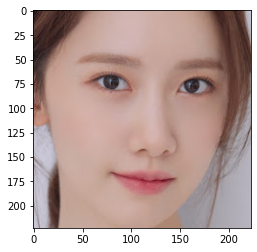

In [4]:
image_file = os.path.join(dir_path, '윤아.jpg') # 경로 설정
face = get_cropped_face(image_file) # 함수 실행

plt.imshow(face) # face를 plt 없이 출력하면 배열 나옴

**얼굴 영역의 좌표**

In [5]:
image_file = os.path.join(dir_path, '윤아.jpg')
image = face_recognition.load_image_file(image_file) # 데이터형을 맞추기 위해 필요
face_locations = face_recognition.face_locations(image)

print("얼굴영역 좌표: {}".format(face_locations))

얼굴영역 좌표: [(93, 315, 316, 92)]


---

## 3. 얼굴 영역 임베딩 구하기

#### 얼굴 영역을 통해 임베딩 벡터를 구하는 함수

- get_face_embedding()

In [6]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [7]:
image_file = os.path.join(dir_path, '윤아.jpg') # 경로 설정
face = get_cropped_face(image_file) # 얼굴 영역 자르기
embedding = get_face_embedding(face) # 영역 임베딩 구하기
embedding

[array([-0.04312247,  0.08564552,  0.03009056, -0.08181583, -0.11011461,
         0.02494148, -0.10772792, -0.05701545,  0.17388532, -0.18900771,
         0.16986866, -0.03416952, -0.17708749, -0.05368887, -0.01866906,
         0.21673702, -0.20324194, -0.17635439, -0.02879484, -0.01345684,
         0.06087445,  0.06625142, -0.01931382,  0.05088738, -0.14900336,
        -0.36360452, -0.07931203, -0.00558482, -0.00789603, -0.08097173,
        -0.07099783,  0.06724349, -0.19027036,  0.01524133,  0.0240485 ,
         0.09224878,  0.01277889, -0.13150908,  0.16621512,  0.04842792,
        -0.27101019,  0.04768866,  0.03001825,  0.22964384,  0.1573851 ,
        -0.02196661,  0.0071197 , -0.13134143,  0.13647683, -0.15807396,
         0.03541355,  0.16926353, -0.00215843,  0.05462443,  0.00675566,
        -0.12905742,  0.01647738,  0.14232153, -0.10321216, -0.04842221,
         0.03842257, -0.02524096,  0.01162205, -0.11770099,  0.17995374,
         0.0968788 , -0.06566481, -0.26271284,  0.1

#### 임베딩 벡터 딕셔너리 만들기
- get_face_embedding_dict()

In [8]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        try:
            image_file = os.path.join(dir_path, file) # 경로 설정
            face = get_cropped_face(image_file) # 얼굴 영역 자르기
        except:
            os.remove(image_file) # 얼굴 영역 인식이 안되는 경우 삭제
            print(file, "삭제")

        embedding = get_face_embedding(face) # 얼굴 영역을 임베딩 벡터로 전환
        if len(embedding) > 0: # 임베딩이 0인 경우 = 비정상이기 때문에 제외
            embedding_dict[os.path.splitext(file)[0]] = embedding[0] # 파일명에서 확장자가 제거된 상태로 이름 저장
    
    return embedding_dict

embedding_dict = get_face_embedding_dict(dir_path)

산들.jpeg 삭제

In [9]:
embedding_dict['윤아'] # 딕셔너리가 잘 생성되었는지 위의 임베딩과 비교

array([-0.04312247,  0.08564552,  0.03009056, -0.08181583, -0.11011461,
        0.02494148, -0.10772792, -0.05701545,  0.17388532, -0.18900771,
        0.16986866, -0.03416952, -0.17708749, -0.05368887, -0.01866906,
        0.21673702, -0.20324194, -0.17635439, -0.02879484, -0.01345684,
        0.06087445,  0.06625142, -0.01931382,  0.05088738, -0.14900336,
       -0.36360452, -0.07931203, -0.00558482, -0.00789603, -0.08097173,
       -0.07099783,  0.06724349, -0.19027036,  0.01524133,  0.0240485 ,
        0.09224878,  0.01277889, -0.13150908,  0.16621512,  0.04842792,
       -0.27101019,  0.04768866,  0.03001825,  0.22964384,  0.1573851 ,
       -0.02196661,  0.0071197 , -0.13134143,  0.13647683, -0.15807396,
        0.03541355,  0.16926353, -0.00215843,  0.05462443,  0.00675566,
       -0.12905742,  0.01647738,  0.14232153, -0.10321216, -0.04842221,
        0.03842257, -0.02524096,  0.01162205, -0.11770099,  0.17995374,
        0.0968788 , -0.06566481, -0.26271284,  0.11392888, -0.13

---

## 4. 내 사진과 연예인 사진 비교하기

**내 사진끼리 임베딩 벡터 거리(베이스라인) 구하기**

In [10]:
distances = np.linalg.norm(embedding_dict['wbj1'] - embedding_dict['wbj2'], ord=2)
print(f"베이스 라인: {distances}")

베이스 라인: 0.3273222717093152


**두 파일명을 받아 얼굴 임베딩 사이 거리 구하는 함수**
- get_distance()

In [11]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1] - embedding_dict[name2], ord=2)

In [12]:
get_distance('윤아', '봉준호')

0.5702259597172021

**나와 닮은 연예인 사진 찾는 함수**
- get_nearest_face()

In [13]:
def get_sort_key_func(name1): 
    def get_distance_from_name1(name2): # 함수 활용법
        return get_distance(name1, name2)
    return get_distance_from_name1

In [14]:
def get_nearest_face(name, top=5): # 입력값과 가장 가까운 값 5개 반환
    sort_key_func = get_sort_key_func(name) # 거리
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0])) # 이름
    
    for i in range(top+2):
        if i == 0: # 자기자신 제외
            continue
        if i == 1: # 본인사진 두장
            continue
        if sorted_faces[i]:
            print("순위 {}: 이름({}), 거리({})".format(i-1, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [15]:
get_nearest_face('wbj1')

순위 1: 이름(정수빈), 거리(0.36243432390625313)
순위 2: 이름(안재홍), 거리(0.40258151964410105)
순위 3: 이름(디오), 거리(0.40350580564319116)
순위 4: 이름(박명수), 거리(0.4094548294821656)
순위 5: 이름(온앤오프라운), 거리(0.4143526931407735)


In [16]:
get_nearest_face('wbj2')

순위 1: 이름(김영삼), 거리(0.4242226364678965)
순위 2: 이름(정형돈), 거리(0.42700223793965203)
순위 3: 이름(이경규), 거리(0.42942837472774736)
순위 4: 이름(김광현), 거리(0.4310094444808696)
순위 5: 이름(박건우), 거리(0.4394651108799808)


---

## 5. 고찰(다양한 시각화)

### 5-1 표 형식

In [17]:
sort_key_func = get_sort_key_func('wbj1') # 거리
sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0])) # 이름

name_list1 = []
distance_list1 = []
for i in range(7):
    if i == 0 or i == 1: # 7장 - 본인 사진 2장 = 닮은 사진(TOP5)
        continue
    else:
        name_list1.append(sorted_faces[i][0])
        distance_list1.append(sort_key_func(sorted_faces[i][0]))

data = {'Name' : name_list1, 'Distance' : distance_list1}

df = pd.DataFrame(data, index = [1, 2, 3, 4, 5])
df

,Name,Distance
1,정수빈,0.362434
2,안재홍,0.402582
3,디오,0.403506
4,박명수,0.409455
5,온앤오프라운,0.414353


In [18]:
sort_key_func = get_sort_key_func('wbj2') # 거리
sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0])) # 이름

name_list2 = []
distance_list2 = []
for i in range(7):
    if i == 0 or i == 1: # 7장 - 본인 사진 2장 = 닮은 사진(TOP5)
        continue
    else:
        name_list2.append(sorted_faces[i][0])
        distance_list2.append(sort_key_func(sorted_faces[i][0]))

data = {'Name' : name_list2, 'Distance' : distance_list2}

df = pd.DataFrame(data, index = [1, 2, 3, 4, 5])
df

,Name,Distance
1,김영삼,0.424223
2,정형돈,0.427002
3,이경규,0.429428
4,김광현,0.431009
5,박건우,0.439465


### 5-2 이미지 출력

In [42]:
# 나와 닮은 TOP 10 얼굴 영역 잘라내어 저장하기
my_list1 = ['wbj1.jpg', '정수빈.jpg', '안재홍.jpg', '디오.jpg', '박명수.jpg', '온앤오프라운.jpg']
my_list2 = ['wbj2.jpg', '김영삼.jpg', '정형돈.jpg', '이경규.jpg', '김광현.jpg', '박건우.jpg']

def cropped_face_list(dir_path):
    file_list = os.listdir(dir_path)
    
    for file in my_list1: # 1과 2 실행
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        pillow_image = Image.fromarray(face) # numpy 배열을 PIL이미지로 변환
        path_to_save = os.path.join(save_path, file)
        pillow_image.save(path_to_save)
            
save_path = os.getenv('HOME')+'/aiffel/aiffel_exploration/E5_image/cropped_image'
cropped_face_list(dir_path)

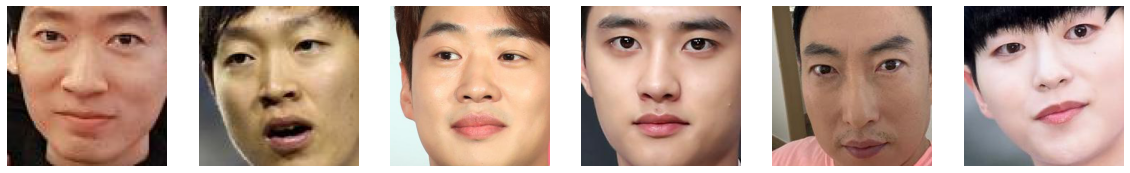

순위 1: 이름(정수빈), 거리(0.36243432390625313)
순위 2: 이름(안재홍), 거리(0.40258151964410105)
순위 3: 이름(디오), 거리(0.40350580564319116)
순위 4: 이름(박명수), 거리(0.4094548294821656)
순위 5: 이름(온앤오프라운), 거리(0.4143526931407735)


In [48]:
# 프레임 만들기
fig, axes = plt.subplots(1, 6, figsize=(20, 10))

# 각각의 이미지 채우기
for i, ax in enumerate(axes.flatten()):
    image = img.imread(save_path+'/'+my_list1[i])
    ax.imshow(image)
    ax.axis('off')

plt.show()
fig.tight_layout() # 레이아웃 그리기
get_nearest_face('wbj1')

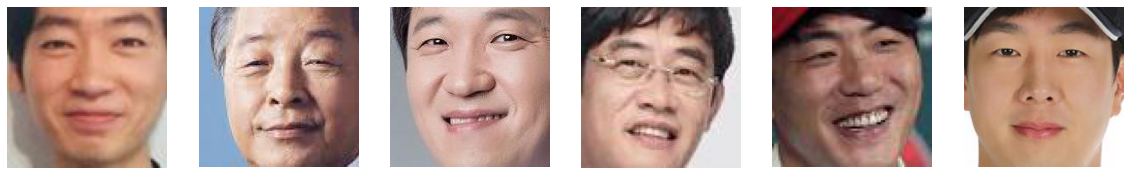

순위 1: 이름(김영삼), 거리(0.4242226364678965)
순위 2: 이름(정형돈), 거리(0.42700223793965203)
순위 3: 이름(이경규), 거리(0.42942837472774736)
순위 4: 이름(김광현), 거리(0.4310094444808696)
순위 5: 이름(박건우), 거리(0.4394651108799808)


In [49]:
fig, axes = plt.subplots(1, 6, figsize=(20, 10))

for i, ax in enumerate(axes.flatten()):
    image = img.imread(save_path+'/'+my_list2[i])
    ax.imshow(image)
    ax.axis('off')

plt.show()
fig.tight_layout()
get_nearest_face('wbj2')

---

- **데이터 전처리**   
 - 임베딩 벡터 딕셔너리를 만드는 중 오류가 발생. 이는 불량데이터 때문으로 확인함. 예외처리에 대한 부분을 놓치지 않도록 조심할 것
 - 경로 변수가 길어지면서 실수 유발. 경로 지정에 대해 깔끔한 정리를 진행할 예정

<br>
 
- **Face Recognition**   
 - dlib과 해당 라이브러리에 대한 좀 더 깊은 이해 필요
 - FaceNet에 대한 추가적인 공부 필요

<br>

- **닮은 연예인**   
 - 결과 이미지와 본인 사진과의 거리가 0.4 정도이나 결과 이미지간에도 개성이 뚜렷한 얼굴들이 있어 결과값을 신뢰할 수 있는건지 의문이다.
 - 다만 개그맨(이경규, 박명수, 정형돈)이나 야구선수(김광현, 박건우, 정수빈) 사진이 많은 걸로 봐서 얼굴이 개그맨 상이거나 운동선수 상인가보다라는 결론을 낼 수 있겠다..😥

<br>

- **데이터 시각화**   
 - tkinter, flask를 활용할 수 있다는 힌트를 보고 시도하였으나 성공하지 못함. 추후 노드를 더 진행하며 경험을 쌓아 이들을 활용해볼 예정
 - 여러가지 데이터 시각화 방법에 대해 배웠으나 실제로 적용하려고 하니 기억이 안나고, 내가 원하는대로 보여지지 않음을 깨달음. 추후 데이터 시각화 이론 부분에 대해 다시한번 공부하고 연습하는 시간을 가질 예정